In [3]:
import importlib

In [1]:
import matplotlib

In [2]:
matplotlib.use('Agg')

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy

In [1]:
import os

In [3]:
import pickle

---

# Extracting Interactions from BIOGRID

**2015 November 30**

Using BIOGRID v3.4.130

In [2]:
readPath = os.path.join('..', '..','DataDownload', 'BIOGRID', 'BIOGRID-ORGANISM-3.4.130.tab2', 
                        'BIOGRID-ORGANISM-Homo_sapiens-3.4.130.tab2.txt')

In [3]:
writePath = os.path.join('..', 'data', 'BIOGRID-3.4.130-human.txt')

In [4]:
colNum = open(readPath).readline().strip().split('\t').index('Experimental System Type')

In [5]:
with open(writePath, 'w') as fid:
    fid.writelines([line for line in open(readPath) if line.split('\t')[colNum] == 'genetic'])

## Breakdown of experimental evidence codes

**2015 November 30**

Using BIOGRID v3.4.130

In [6]:
typeCounts = dict()
genes = set()
colNum = 1  # using Entrez
for line in open(os.path.join('..', 'data', 'BIOGRID-3.4.130-human.txt')):
    tokens = line.split('\t')
    genes.update(tokens[colNum:colNum+2])
    typeCounts[tokens[11]] = typeCounts.get(tokens[11], 0) + 1

In [7]:
len(genes)

1467

In [8]:
typeCounts

{'Dosage Growth Defect': 14,
 'Dosage Lethality': 109,
 'Dosage Rescue': 70,
 'Negative Genetic': 2,
 'Phenotypic Enhancement': 198,
 'Phenotypic Suppression': 199,
 'Synthetic Growth Defect': 465,
 'Synthetic Lethality': 344,
 'Synthetic Rescue': 129}

---

# Predictability in BIOGRID Interaction Types

**2015 August 11**

Using BIOGRID v3.4.127

In [6]:
os.chdir('/work/jyoung/genetic_interact/src')

Number of genes in functional network: 18031
Number of genes in interactions: 111
Number of seed sets: 103


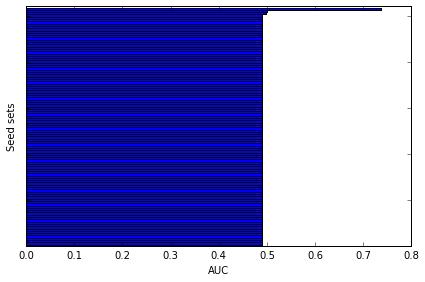

In [18]:
%run func_net_pred 'Dosage Lethality'

Number of genes in functional network: 18031
Number of genes in interactions: 89
Number of seed sets: 15


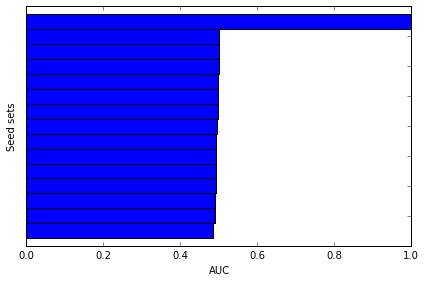

In [20]:
%run func_net_pred 'Dosage Rescue'

Number of genes in functional network: 18031
Number of genes in interactions: 252
Number of seed sets: 203


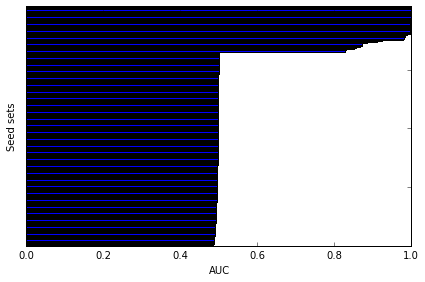

In [21]:
%run func_net_pred 'Phenotypic Enhancement'

Number of genes in functional network: 18031
Number of genes in interactions: 249
Number of seed sets: 182


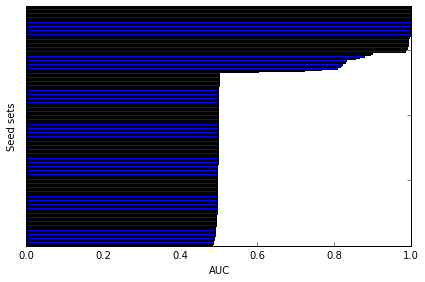

In [22]:
%run func_net_pred 'Phenotypic Suppression'

Number of genes in functional network: 18031
Number of genes in interactions: 152
Number of seed sets: 16


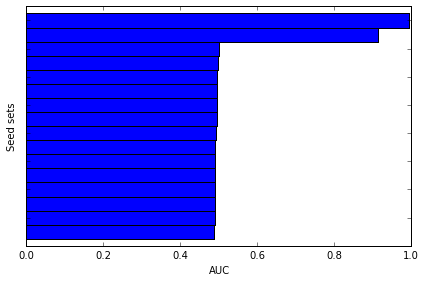

In [23]:
%run func_net_pred 'Synthetic Growth Defect'

Number of genes in functional network: 18031
Number of genes in interactions: 138
Number of seed sets: 16


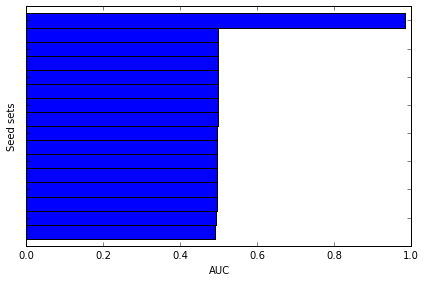

In [24]:
%run func_net_pred 'Synthetic Rescue'

---

# Output Gene Names in Predictive Seed Sets

**2015 August 11**

Entrez IDs have been used for both the BIOGRID genetic interactions and HumanNet; conversion to gene symbols will be needed. Following the approach in the IPython notebook *Fly Genetic Interactions.ipynb*, use the R Bioconductor library *org.Hs.eg.db* (specifically *org.Hs.egSYMBOL*) to output a conversion table to text, which can be read and stored in Python. 

    > library("org.Hs.eg.db")
    > entrezIDs <- ls(org.Hs.egSYMBOL)
    > length(entrezIDs)
    [1] 56340
    > entrezIDs[1:10]
    [1] "1" "2" "3" "9" "10" "11" "12" "13" "14" "15"
    > head(toTable(org.Hs.egSYMBOL[entrezIDs]))
      gene_id symbol
    1       1   A1BG
    2       2    A2M
    3       3  A2MP1
    4       9   NAT1
    5      10   NAT2
    6      11   NATP
    > conversTab <- toTable(org.Hs.egSYMBOL[entrezIDs])
    > write.table(conversTab, file="/work/jyoung/DataProcessed/org.Hs.egSYMBOL.txt",
                  quote=FALSE, sep="\t", row.names=FALSE)

Next, verify that the table has unique gene IDs and read this conversion table into a Python dictionary. 

In [1]:
%%bash
head -5 /work/jyoung/DataProcessed/org.Hs.egSYMBOL.txt

gene_id	symbol
1	A1BG
2	A2M
3	A2MP1
9	NAT1


In [2]:
%%bash
cut -f1 /work/jyoung/DataProcessed/org.Hs.egSYMBOL.txt | sort | uniq | wc -l

56341


In [4]:
entrez2name = dict()
fid = open('/work/jyoung/DataProcessed/org.Hs.egSYMBOL.txt')
header = fid.readline()
for line in fid:
    tokens = line.strip().split('\t')
    entrez2name[tokens[0]] = tokens[1]
fid.close()

Now check whether all of the Entrez IDs in FlyNet are included in the conversion dictionary.

In [5]:
allNetEntrez = set()
for line in open('/work/jyoung/DataDownload/FunctionalNet/H6Net_CC.net'):
    allNetEntrez.update(line.split('\t')[:2])

In [6]:
len(allNetEntrez)

18031

In [7]:
len(allNetEntrez - set(entrez2name.keys()))

0

In [8]:
pickle.dump(entrez2name, open('/work/jyoung/PyPickle/humanEntrez2names.p', 'wb'))

**2015 August 12**

Finally, write out the predictive seed sets.

In [5]:
%run func_net_pred 'Dosage Rescue'

Number of genes in functional network: 18031
Number of genes in interactions: 89
Number of seed sets: 15


In [6]:
%run func_net_pred 'Phenotypic Enhancement'

Number of genes in functional network: 18031
Number of genes in interactions: 252
Number of seed sets: 203


In [7]:
%run func_net_pred 'Phenotypic Suppression'

Number of genes in functional network: 18031
Number of genes in interactions: 249
Number of seed sets: 182


In [8]:
%run func_net_pred 'Synthetic Growth Defect'

Number of genes in functional network: 18031
Number of genes in interactions: 152
Number of seed sets: 16


In [9]:
%run func_net_pred 'Synthetic Rescue'

Number of genes in functional network: 18031
Number of genes in interactions: 138
Number of seed sets: 16


**2015 September 22, 24, 28**

Compare using HumanNet version 2 vs version 1 by plotting the seed set AUCs of version 2 against version 1 for each genetic interaction type. Create a script named *compare_func_net_versions.py* for this purpose.

NOTE: *func_net_pred.py* now accepts 2 command line arguments, the BIOGRID interaction type and the organism. The modified code reduces hard-coded filenames inside individual functions. 

**2015 September 24, 28**

The function *process_func_net( )* assumes that the genes are in columns 1 & 2 and the LLS is in column 3, as it seems must functional networks are in this format. However, HumanNet v1 has the LLS in column 24, so write a new HumanNet v1 file that only has 3 columns with the LLS in column 3:

    cd /work/jyoung/DataDownload/FunctionalNet
    awk '{print $1 "\t" $2 "\t" $24}' HumanNet.v1.join.txt > humannet1.entrez.txt


Number of genes in interactions: 252


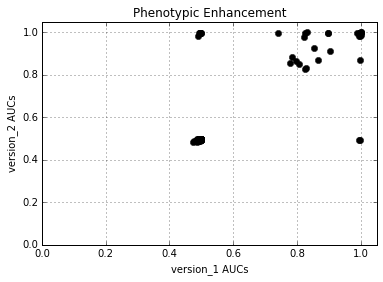

In [7]:
%run compare_func_net_versions.py 'Phenotypic Enhancement' 1 2

Number of genes in interactions: 249


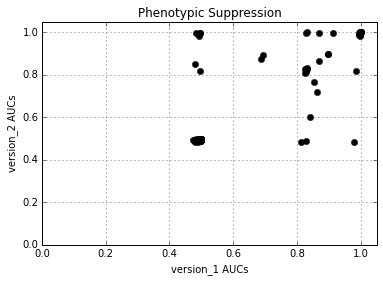

In [8]:
%run compare_func_net_versions.py 'Phenotypic Suppression' 1 2

**2015 November 29-30**

Updated *proteincomplexformat.py* to process downloaded CORUM file into a 2-column format. Unfortunately, it will not be possible to directly process the CORUM file into Entrez IDs. See *Gene ID Conversion.ipynb* for details. 2-column format written by *proteincomplexformat.py* as *CORUM_Human_Entrez.txt*. 

Using *clust_intact.py* at 5% FDR by Benjamini-Hochberg, there were no significant within-complex interactions of out 1618 protein complexes. The background probabilities were: 0.117 (Dosage Growth Defect), 0.0177 (Dosage Lethality), 0.0159 (Dosage Rescue), 0.667 (Negative Genetic), 0.00609 (Phenotypic Enhancement), 0.00671 (Phenotypic Suppression), 0.00453 (Synthetic Growth Defect), 0.00580 (Synthetic Lethality), 0.0119 (Synthetic Rescue).  

For between-complex interactions, there was also no significance from examining 1308153 complex pairs for each interaction type. 